# Project: Optimization of Targeted Advertising Market Campaign

This jupyter notebook will have the following sections: 

1. Business Objective
2. Dataset-Background
3. Clean and Explorer Data
4. Exploratory Analysis and Visualization
5. Feature Selection
6. Model Selection
7. Conclusion

In [1]:
# Importing libraries to used in this notebook
# Data Pre-processing models
import sys
import pandas as pd
import numpy as np 
import datetime
import calendar
from datetime import timedelta,date,time
import ppscore as pps
import scipy.stats as st

# Visualization tools
import matplotlib
import seaborn
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# Sklearn 
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc 
from sklearn.metrics import confusion_matrix,fbeta_score,f1_score
from sklearn.feature_selection import SelectKBest, chi2

# Machine learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.4
Numpy: 1.18.1
Sklearn: 0.22
Matplotlib: 3.1.3
Seaborn: 0.10.0


## 1. Business Objective

The following project is part of an interview showcase study for **XX_Consulting_Company** aiming to help the marketing department to develop an optimized financial strategy for a client's advertising market campaign through the utilization of ML algorithms. 

The machine learning model designed to predict how much profit the marketing team can make by accurately classify which of their target customers are most likely click on the ads. As part of data science cycle, statistical tests, feature selection, feature importance and data visualization are performed to understand how a particular feature contributes to the end results and how can those features help market team to run their campaign in optimized manner.    
         

## 2. Dataset-Background
For the following problem, no much details are given from the company. Thus, I have to assume or define some income statments that will be resulted from ML model: 

1. Client will spend **550 CAD** for a potenial customer. 
2. **Overall Profit** from targeted customer who clicks on ad is **150 CAD**. 
3. **Loss** from targeted customer who does not click on ad is **600 CAD**. 
4. **Profit** from un-targeted customer who clicks on ad is **700 CAD**.
5. Product is **un-known**.


The dataset contains website visitors information and their view of ads. It has 1018 rows and 10 columns as described below: 

1. Daily Time Spent on Site: Time spent by user in the site in Minutes.
2. Age.                         
3. Area Income: Average income of the geographical area of user.                 
4. Daily Internet Usage: Average time spent by user on the internet
5. Ad Topic Line: Headline of the advertisement    
6. City                        
7. Male: gender, 1 for Male and 0 for Female.                        
8. Country                     
9. Timestamp: Data and time at which consumer clicked on the Ad or close window (not clicked)                  
10. Clicked on Ad: Target variable, 1 for clicked, 0 for not clicked.   

## 3. Clean and Explorer Data
The purpose of this section is to ensure we have a good data quality. To do so, couple of commands and approaches are executed to prepare data for EDA, Feature Engineering and ML modeling. 

1. Explorer data features and observations. 
2. Business logic validation in data. 
3. Check missing values and duplicates. 

### 3.1 Explorer Data

In [2]:
# Read the data
df = pd.read_csv('Targeting_Market_Campagin_Data.csv')
# Get some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1018 non-null   float64
 1   Age                       1018 non-null   int64  
 2   Area Income               1018 non-null   float64
 3   Daily Internet Usage      1018 non-null   float64
 4   Ad Topic Line             1018 non-null   object 
 5   City                      1018 non-null   object 
 6   Male                      1018 non-null   int64  
 7   Country                   1018 non-null   object 
 8   Timestamp                 1018 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB


In [3]:
print("The shape of data is", df.shape)

The shape of data is (1018, 10)


In [4]:
# Rename the columns
df.rename(columns = {'Daily Time Spent on Site':'Daily_Time_Spent_on_Site', 'Area Income':'Area_Income',
                     'Daily Internet Usage':'Daily_Internet_Usage','Ad Topic Line':'Ad_Topic_Line',
                     'Clicked on Ad':'Clicked_on_Ad'}, inplace = True)
df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


### 3.2 Business Logic Validation in Data
As part of ensuring a data quality and represenations, it is important to validate business logic inside features. Thus, I make my own approach to investigate the data in the following points: 

1. People who explorer data are aged between 19 and 60 years. I observe some outliers in age such as a negative value for age!, 999 years old, 103 years old explorer internet! Thus, I get rid of them, those are wrong enteries from some consumers. 

2. Daily time spent on site has to be less than time spent on internet usage. Unfortunately, there some observations where daily time spent on site greater than time spent on internet! Thus, I get rid of those observations. 



In [5]:
# Get data description
df.describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1014.000000
mean,64.999921,36.936149,54983.348988,179.381906,0.481336,0.500986
std,15.871054,31.566241,13445.569214,44.417978,0.499897,0.500246
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.320000,29.000000,46966.620000,138.582500,0.000000,0.000000
50%,68.105000,35.000000,57023.600000,182.425000,0.000000,1.000000
75%,78.562500,42.000000,65451.787500,218.207500,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


In [6]:
# Investigate the age, aiming to understand why we have negative value and some outliers 
df[(df['Age']<19) | (df['Age']>60)]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
294,56.01,-25,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59,1.0
495,50.60,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.20,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0
684,66.08,61,58966.22,184.23,Synchronized multi-tasking ability,Klineside,1,Cuba,2016-01-07 23:02,1.0
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [7]:
# Consider only age that make sense, and rest are wrong enteries or outliers! 
df = df[~((df['Age']<19) | (df['Age']>60))]

In [8]:
# Let's invesitage if any time spent > Daily internet usage
df[df['Daily_Time_Spent_on_Site'] > df['Daily_Internet_Usage']]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
114,46.13,46,37838.72,23.64,Horizontal hybrid challenge,New Rachel,1,Guyana,2016-01-09 5:44,1.0
331,86.78,30,54952.42,70.13,Fundamental zero tolerance solution,New Steve,1,United States of America,2016-02-18 23:08,0.0
404,66.99,47,27262.51,24.44,Operative actuating installation,Lopezberg,1,Tanzania,2016-06-15 11:56,1.0


In [9]:
# Consider only daily time spent which is less than daily time spent on internet 
df = df[~(df['Daily_Time_Spent_on_Site'] > df['Daily_Internet_Usage'])]

### 3.3 Check Missing Values & Duplicates

In [10]:
# Lets see if we have any null values,and it is good practice to convert all empty space if exist. 
df = df.replace(r'^\s*$', np.nan, regex=True)
print(df.isnull().mean().sort_values(ascending=True))

Daily_Time_Spent_on_Site    0.00000
Age                         0.00000
Area_Income                 0.00000
Daily_Internet_Usage        0.00000
Ad_Topic_Line               0.00000
City                        0.00000
Male                        0.00000
Country                     0.00000
Timestamp                   0.00000
Clicked_on_Ad               0.00396
dtype: float64


Hoops! we got some null values, let's look at those values and give it a try if any there is any room to perform a proper imputation. 

In [11]:
# Let's discover nans, and check if there is any opportunity to imputate
df[df['Clicked_on_Ad'].isnull()]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
131,67.36,37,73104.47,233.56,Future-proofed grid-enabled implementation,North Wesleychester,0,Jersey,2016-07-06 16:00,NaN
217,67.28,43,76246.96,155.80,Future-proofed coherent hardware,North Mercedes,1,Pakistan,2016-04-03 21:13,NaN
431,34.30,41,53167.68,160.74,Re-contextualized reciprocal interface,West Melaniefurt,1,Libyan Arab Jamahiriya,2016-05-16 14:50,NaN
722,46.89,48,72553.94,176.78,Polarized mission-critical structure,Chaseshire,1,Turkey,2016-07-17 13:22,NaN


Unfortunately, there is not any trend associated with missing values, also, there are only 4 null rows. Thus, dropping them will not affect data quality, rather it will boost model performance. 

In [12]:
# Dropping missing values
df.dropna(inplace=True)
print(df.isnull().mean().sort_values(ascending=True))

Daily_Time_Spent_on_Site    0.0
Age                         0.0
Area_Income                 0.0
Daily_Internet_Usage        0.0
Ad_Topic_Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked_on_Ad               0.0
dtype: float64


In [13]:
# Let's check if we have any duplicates and remove them 
df[df.duplicated()]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
162,75.55,36,73234.87,159.24,Managed grid-enabled standardization,Ramirezside,0,Liechtenstein,2016-05-09 2:58,1.0
222,53.30,34,44893.71,111.94,Self-enabling optimal initiative,West Jessicahaven,0,Mauritania,2016-05-06 21:07,1.0
235,84.08,30,62336.39,187.36,Face-to-face intermediate approach,Carterburgh,1,Fiji,2016-01-13 2:58,0.0
923,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
924,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
925,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
944,72.55,22,58953.01,202.34,Balanced empowering success,New Cynthia,0,Bosnia and Herzegovina,2016-02-08 7:33,0.0


In [14]:
# looks like the true duplicated ones are those with following index 923,924,925, rest are false alarm 
df.drop([923,924,925],axis=0,inplace=True)

## 4. Exploratory Analysis and Visualization

The aim of this section is to extract datetime features and utilize them to gain any insights about customer behaviours and patterns in the data. 

In [15]:
# Let's do some pre-processing 
# convert timestamp to datetime,get the Date
df['Timestamp']= pd.to_datetime(df['Timestamp'])
# df['Date'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].apply(lambda x: x.date())

# Get the time 
# df['Time'] = pd.to_datetime(df['Timestamp'])
df['Time'] = df['Timestamp'].dt.strftime('%H').astype(int)
# df['Time'] = df['Time'].astype(int)
 
df['Week_Day'] = df['Timestamp'].dt.dayofweek
df['Day_Week'] = df['Timestamp'].dt.day_name()

df['Month'] = df['Timestamp'].dt.month 

df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Drop the Timestamp column 
df.drop('Timestamp',axis=1,inplace=True)
df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,Date,Time,Week_Day,Day_Week,Month,Month_Name
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0.0,2016-03-27,0,6,Sunday,3,Mar
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0.0,2016-04-04,1,0,Monday,4,Apr
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0.0,2016-03-13,20,6,Sunday,3,Mar
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0.0,2016-01-10,2,6,Sunday,1,Jan
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0.0,2016-06-03,3,4,Friday,6,Jun


In [16]:
# subseting the click class into clicked and not clicked
clicked = df[df['Clicked_on_Ad']==1]
# clicked_male = clicked[clicked['Male']==1]
# clicked_female = clicked[clicked['Male']==0]

not_clicked = df[df['Clicked_on_Ad']==0]
# not_clicked_male = not_clicked[not_clicked['Male']==1]
# not_clicked_female = not_clicked[not_clicked['Male']==0]

Class distribution for target variable is balance, this is a good news. Almost 50% for clicked class and 50% for not clicked class. In addition, the target class has a normal distribution, no skewness! 

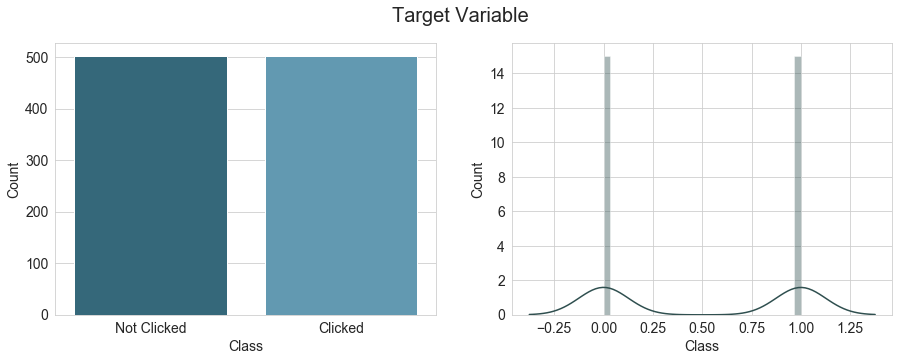

In [17]:
# Visualize class distribution 
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.suptitle("Target Variable",fontsize=20)

# Daily time spent on site distribution for target marketing ads
plt.subplot(1, 2, 1)
ax= sns.countplot(x='Clicked_on_Ad', data=df, palette="PuBuGn_d")
ax.set_xticklabels(["Not Clicked","Clicked"])
# ax.axes.set_title("Distribution of Click Class",fontsize=20)
ax.set_xlabel("Class",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)

plt.subplot(1, 2, 2)
ax=sns.distplot(df['Clicked_on_Ad'].values,bins=30,color='darkslategrey')
# ax.axes.set_title("Distribution of Click Class",fontsize=20)
ax.set_xlabel("Class",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.show();

In [18]:
# Get the class distribution
df.groupby('Clicked_on_Ad').count()['Age']

Clicked_on_Ad
0.0    502
1.0    501
Name: Age, dtype: int64

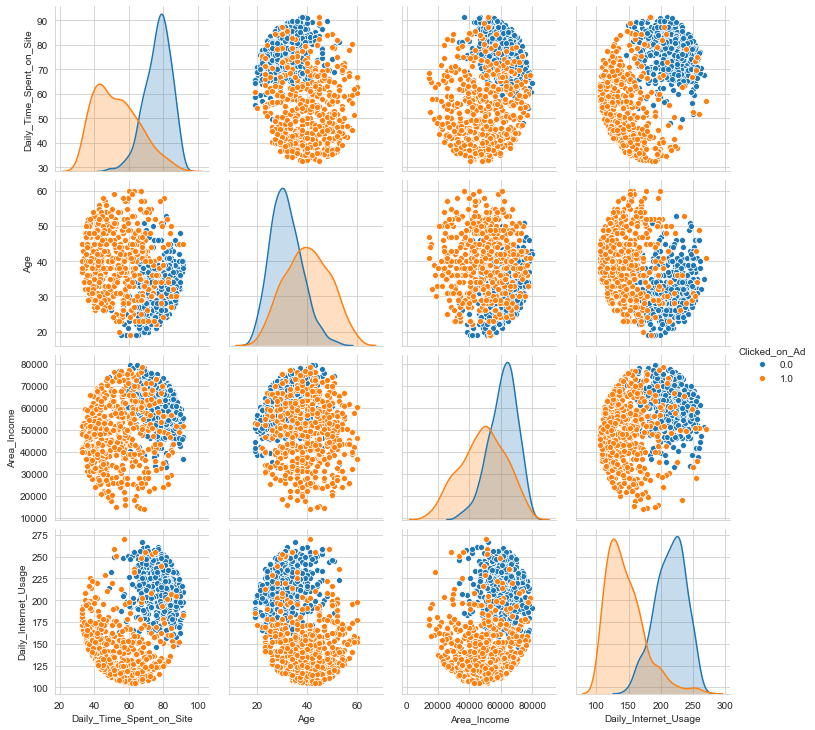

In [19]:
# Get a quick glance of data, by using pairplot for all data
num_col=['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage']
sns.pairplot(data = df, vars = num_col, hue='Clicked_on_Ad');

The above pairplot gives a quick glance about information extracted from the data. It shows different patterns for consumers who clicked and who did not clicked on the ads. Here are some insights obtained from pairplot: 

1. Consumers who clicked on ad tend to spend less time on site and on internet compared to consumers who did not clicked. 
2. Consumers who clicked on ad aged between 35-55 tend to spend less time on site as well as on internet.
3. Consumers who did not click on ad come from middle class average income (50K-80K), they tend to spend more time on site compared to clicked ones. 

**Summary Insight:**

*Consumers who spend less time on site, less time on internet, low income class(less than 50k) and aged are more likely to click on the ad*.  

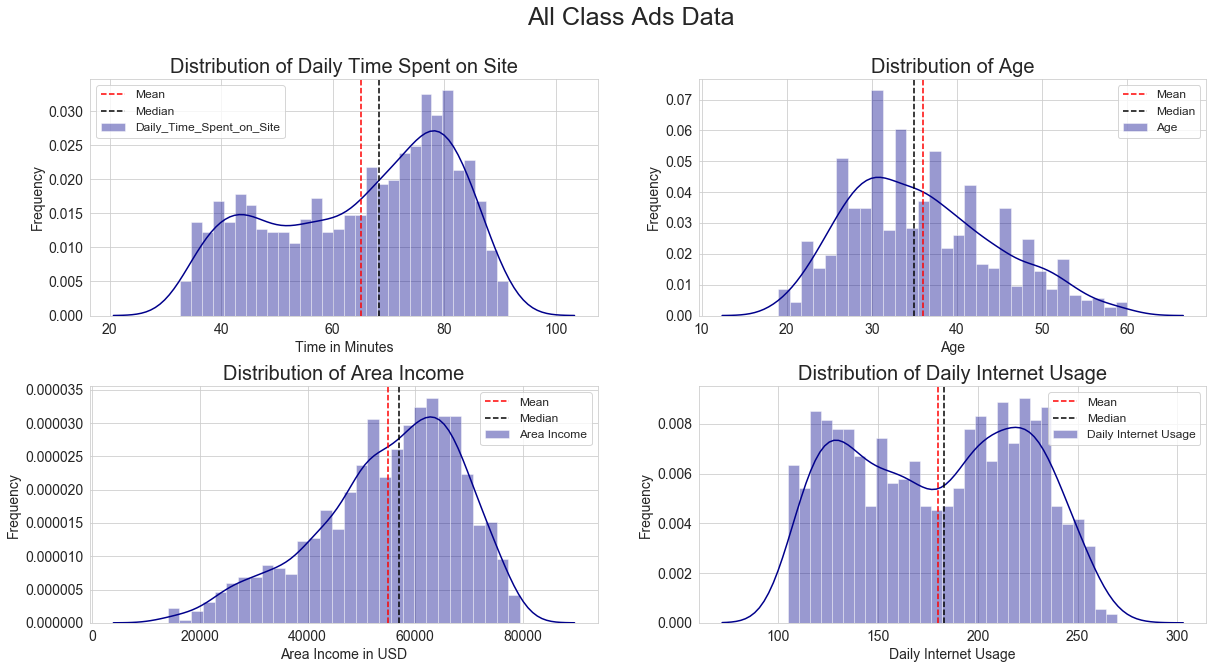

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.suptitle("All Class Ads Data",fontsize=25)

# Daily time spent on site distribution for target marketing ads
plt.subplot(2, 2, 1)
ax=sns.distplot(df["Daily_Time_Spent_on_Site"].values,label="Daily_Time_Spent_on_Site",bins=30,color='darkblue')
plt.axvline(x=df["Daily_Time_Spent_on_Site"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=df["Daily_Time_Spent_on_Site"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Time Spent on Site",fontsize=20)
ax.set_xlabel("Time in Minutes",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(df["Daily_Time_Spent_on_Site"].values), max(df["Daily_Time_Spent_on_Site"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Age distribution for target marketing ads
plt.subplot(2, 2, 2) 
ax=sns.distplot(df["Age"].values,label="Age",bins=30,color='darkblue')
plt.axvline(x=df["Age"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=df["Age"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Age",fontsize=20)
ax.set_xlabel("Age",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(df["Age"].values), max(df["Age"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# # Area income distribution for target marketing ads
plt.subplot(2, 2, 3)
ax=sns.distplot(df["Area_Income"].values,label="Area Income",bins=30,color='darkblue')
plt.axvline(x=df["Area_Income"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=df["Area_Income"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Area Income",fontsize=20)
ax.set_xlabel("Area Income in USD",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(df["Area_Income"].values), max(df["Area_Income"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Daily internet usage distribution for target marketing ads
plt.subplot(2, 2, 4)
ax =sns.distplot(df["Daily_Internet_Usage"].values,label="Daily Internet Usage",bins=30,color='darkblue')
plt.axvline(x=df["Daily_Internet_Usage"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=df["Daily_Internet_Usage"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Internet Usage",fontsize=20)
ax.set_xlabel("Daily Internet Usage",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(df["Daily_Internet_Usage"].values), max(df["Daily_Internet_Usage"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

plt.show();

1. The Distribution of **daily time spent on site** and **daily internet usage** has two peaks which falls in Bi-nomial distribution. In other words, there exist 2 classes in data that are completely different. 
2. Majority of consumers spent time on site between **65 to 85 minutes**. Those are more like population of consumers who did not click on add. 
3. Majority of consumers for first group in daily internet usage spent time between **100-150 minutes**. However, the second group has higher range, majority spent time between **200-250 minutes** on the internet. 
4. Both daily time on site and internet are not highly skewed, mean and median are close!But both times are negatively skewed (mean < median). 
5. Majority of consumers are aged between **25-50** years old. 
6. The distribution of age is positively skewed (mean > median)
7. Majority of consumers have an average area income between **60k-80k**, mid-class income. 
8. The distribution of average area income is negatively skewed. 

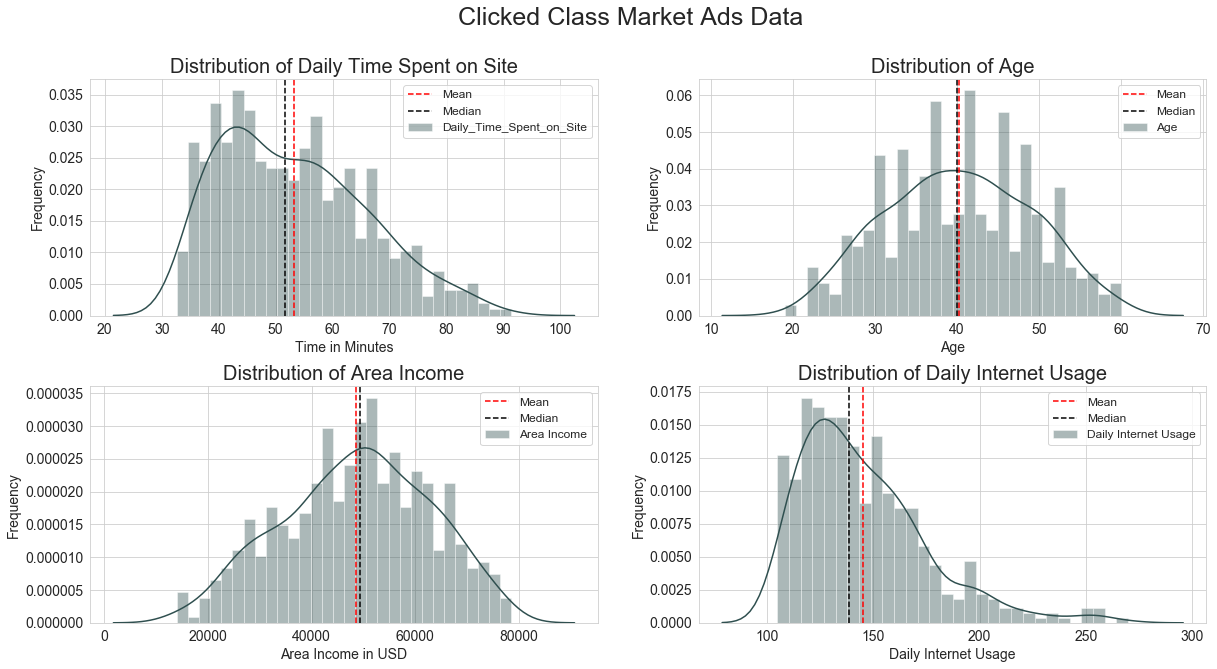

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.suptitle("Clicked Class Market Ads Data",fontsize=25)

# Daily time spent on site distribution for clicked target marketing ads
plt.subplot(2, 2, 1)
ax=sns.distplot(clicked["Daily_Time_Spent_on_Site"].values,label="Daily_Time_Spent_on_Site",bins=30,color='darkslategrey')
plt.axvline(x=clicked["Daily_Time_Spent_on_Site"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=clicked["Daily_Time_Spent_on_Site"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Time Spent on Site",fontsize=20)
ax.set_xlabel("Time in Minutes",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(clicked["Daily_Time_Spent_on_Site"].values), max(clicked["Daily_Time_Spent_on_Site"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Age distribution for clicked target marketing ads
plt.subplot(2, 2, 2) 
ax=sns.distplot(clicked["Age"].values,label="Age",bins=30,color='darkslategrey')
plt.axvline(x=clicked["Age"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=clicked["Age"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Age",fontsize=20)
ax.set_xlabel("Age",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(clicked["Age"].values), max(clicked["Age"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# # Area income distribution for clicked target marketing ads
plt.subplot(2, 2, 3)
ax=sns.distplot(clicked["Area_Income"].values,label="Area Income",bins=30,color='darkslategrey')
plt.axvline(x=clicked["Area_Income"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=clicked["Area_Income"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Area Income",fontsize=20)
ax.set_xlabel("Area Income in USD",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(clicked["Area_Income"].values), max(clicked["Area_Income"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Daily internet usage distribution for clicked target marketing ads
plt.subplot(2, 2, 4)
ax =sns.distplot(clicked["Daily_Internet_Usage"].values,label="Daily Internet Usage",bins=30,color='darkslategrey')
plt.axvline(x=clicked["Daily_Internet_Usage"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=clicked["Daily_Internet_Usage"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Internet Usage",fontsize=20)
ax.set_xlabel("Daily Internet Usage",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(clicked["Daily_Internet_Usage"].values), max(clicked["Daily_Internet_Usage"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

plt.show();

**Clicked Group**

1. This group has a low range of daily time spend on site where majority of consumers' time fall in range of **40-60 minutes* with **positively skewed** distribution. 
2. The age distribution is normal withe mean and median centered at **40** years old.  
3. The average area income has a normal distribution shape with mean centered at **50k**. 
4. The distribution of daily internet usage is positively skewed where majoity of consumers spent time between **100-175** minutes. 

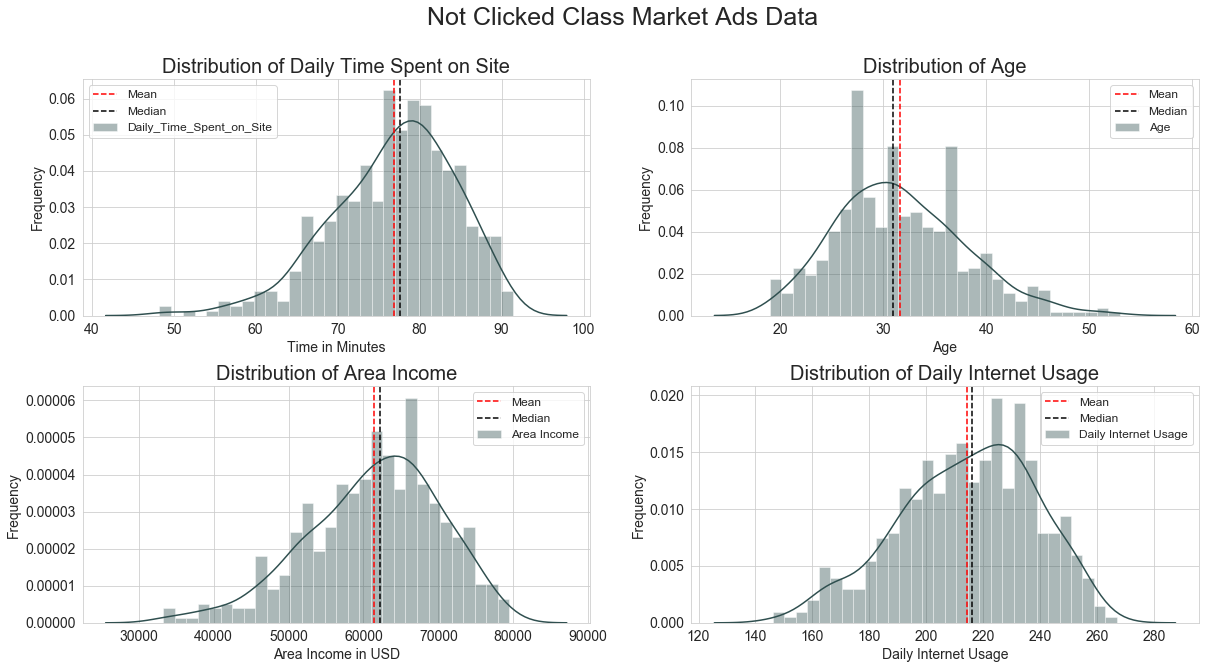

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.suptitle("Not Clicked Class Market Ads Data",fontsize=25)

# Daily time spent on site distribution for clicked target marketing ads
plt.subplot(2, 2, 1)
ax=sns.distplot(not_clicked["Daily_Time_Spent_on_Site"].values,label="Daily_Time_Spent_on_Site",bins=30,color='darkslategrey')
plt.axvline(x=not_clicked["Daily_Time_Spent_on_Site"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=not_clicked["Daily_Time_Spent_on_Site"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Time Spent on Site",fontsize=20)
ax.set_xlabel("Time in Minutes",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(not_clicked["Daily_Time_Spent_on_Site"].values), max(not_clicked["Daily_Time_Spent_on_Site"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Age distribution for clicked target marketing ads
plt.subplot(2, 2, 2) 
ax=sns.distplot(not_clicked["Age"].values,label="Age",bins=30,color='darkslategrey')
plt.axvline(x=not_clicked["Age"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=not_clicked["Age"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Age",fontsize=20)
ax.set_xlabel("Age",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(not_clicked["Age"].values), max(not_clicked["Age"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# # Area income distribution for clicked target marketing ads
plt.subplot(2, 2, 3)
ax=sns.distplot(not_clicked["Area_Income"].values,label="Area Income",bins=30,color='darkslategrey')
plt.axvline(x=not_clicked["Area_Income"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=not_clicked["Area_Income"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Area Income",fontsize=20)
ax.set_xlabel("Area Income in USD",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(not_clicked["Area_Income"].values), max(not_clicked["Area_Income"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

# Daily internet usage distribution for clicked target marketing ads
plt.subplot(2, 2, 4)
ax =sns.distplot(not_clicked["Daily_Internet_Usage"].values,label="Daily Internet Usage",bins=30,color='darkslategrey')
plt.axvline(x=not_clicked["Daily_Internet_Usage"].mean(),color='red',linestyle='--',label="Mean")
plt.axvline(x=not_clicked["Daily_Internet_Usage"].median(),color='black',linestyle='--',label="Median")
ax.axes.set_title("Distribution of Daily Internet Usage",fontsize=20)
ax.set_xlabel("Daily Internet Usage",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
# ax.set_xlim([min(not_clicked["Daily_Internet_Usage"].values), max(not_clicked["Daily_Internet_Usage"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})

plt.show();

**Not Clicked Group**

1. This group has a high range of daily time spend on site where majority of consumers' time fall in range of **70-90 minutes* with **negatively skewed** distribution. 
2. The age distribution is almost approaching a normal distribution with mean around at **31.6**, having low positive skewness. 
3. The average area income is almost approaching a normal distribution with mean around **60K**, hvaing low negative skewness. 
4. The distribution of daily internet usage is negatively skewed where majoity of consumers spent time between **200-260** minutes. 

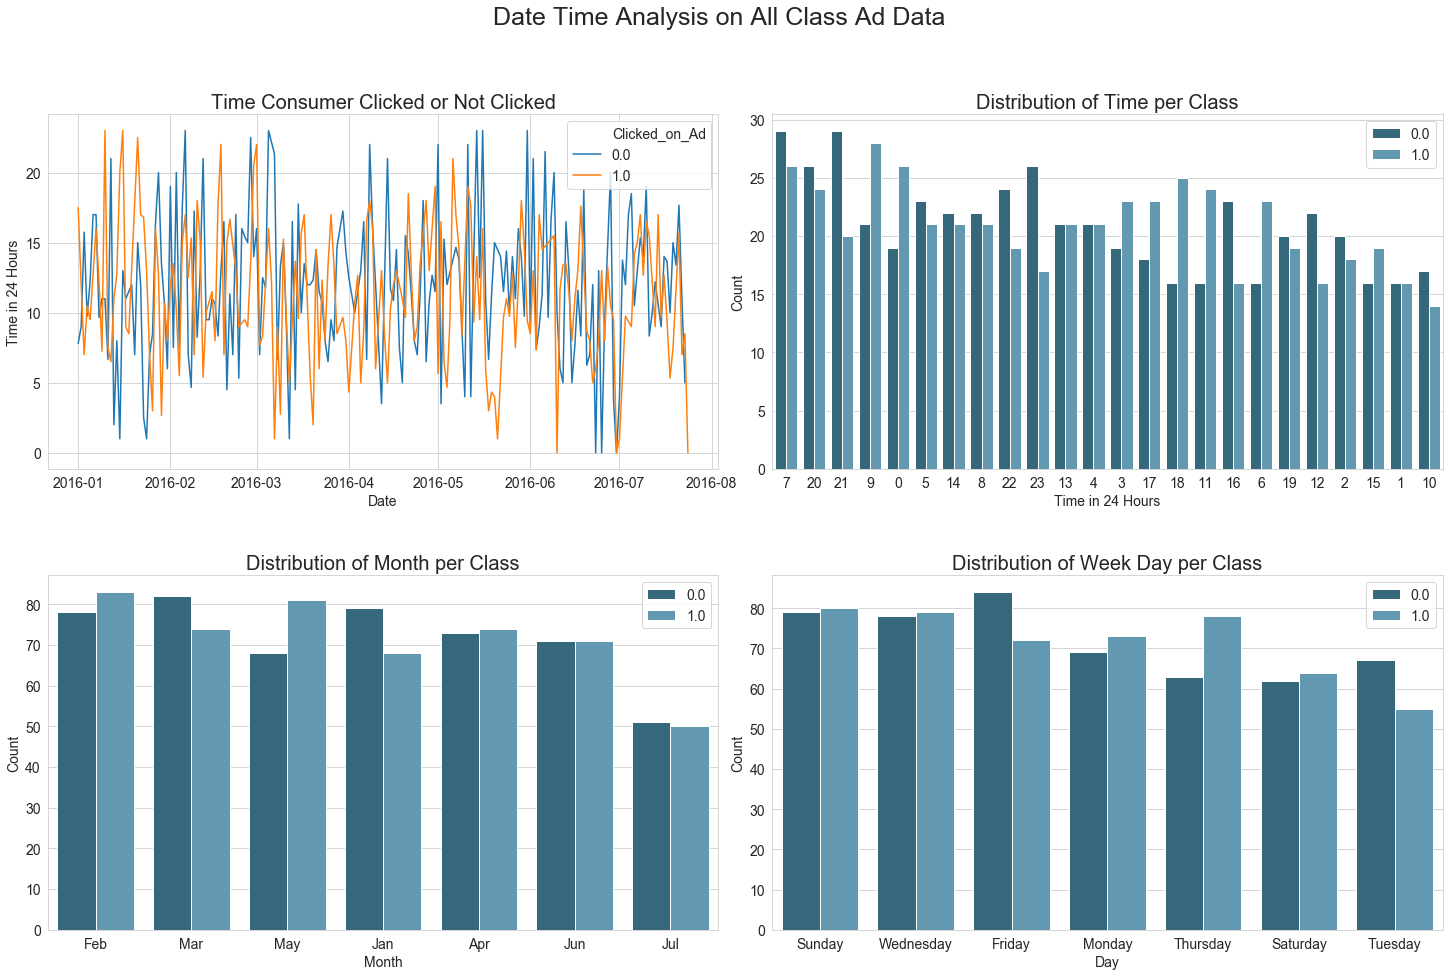

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (25, 15))
plt.subplots_adjust(wspace=0.08, hspace=0.3)

plt.suptitle("Date Time Analysis on All Class Ad Data ",fontsize=25)

# Daily time spent on site distribution for target marketing ads
plt.subplot(2, 2, 1)
ax = sns.lineplot(x=df['Date'],y=df['Time'],data=df,color=['darkblue','darkslategrey'],hue='Clicked_on_Ad',err_style=None)
ax.axes.set_title("Time Consumer Clicked or Not Clicked",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Time in 24 Hours",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 2)
ax= sns.countplot(x='Time', data=df, palette="PuBuGn_d",hue='Clicked_on_Ad',order=df['Time'].value_counts().index)
ax.axes.set_title("Distribution of Time per Class",fontsize=20)
ax.set_xlabel("Time in 24 Hours",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 3)
ax= sns.countplot(x='Month_Name', data=df, palette="PuBuGn_d",hue='Clicked_on_Ad',order=df['Month_Name'].value_counts().index)
ax.axes.set_title("Distribution of Month per Class",fontsize=20)
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 4)
ax= sns.countplot(x='Day_Week', data=df, palette="PuBuGn_d",hue='Clicked_on_Ad',order=df['Day_Week'].value_counts().index)
ax.axes.set_title("Distribution of Week Day per Class",fontsize=20)
ax.set_xlabel("Day",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.show();

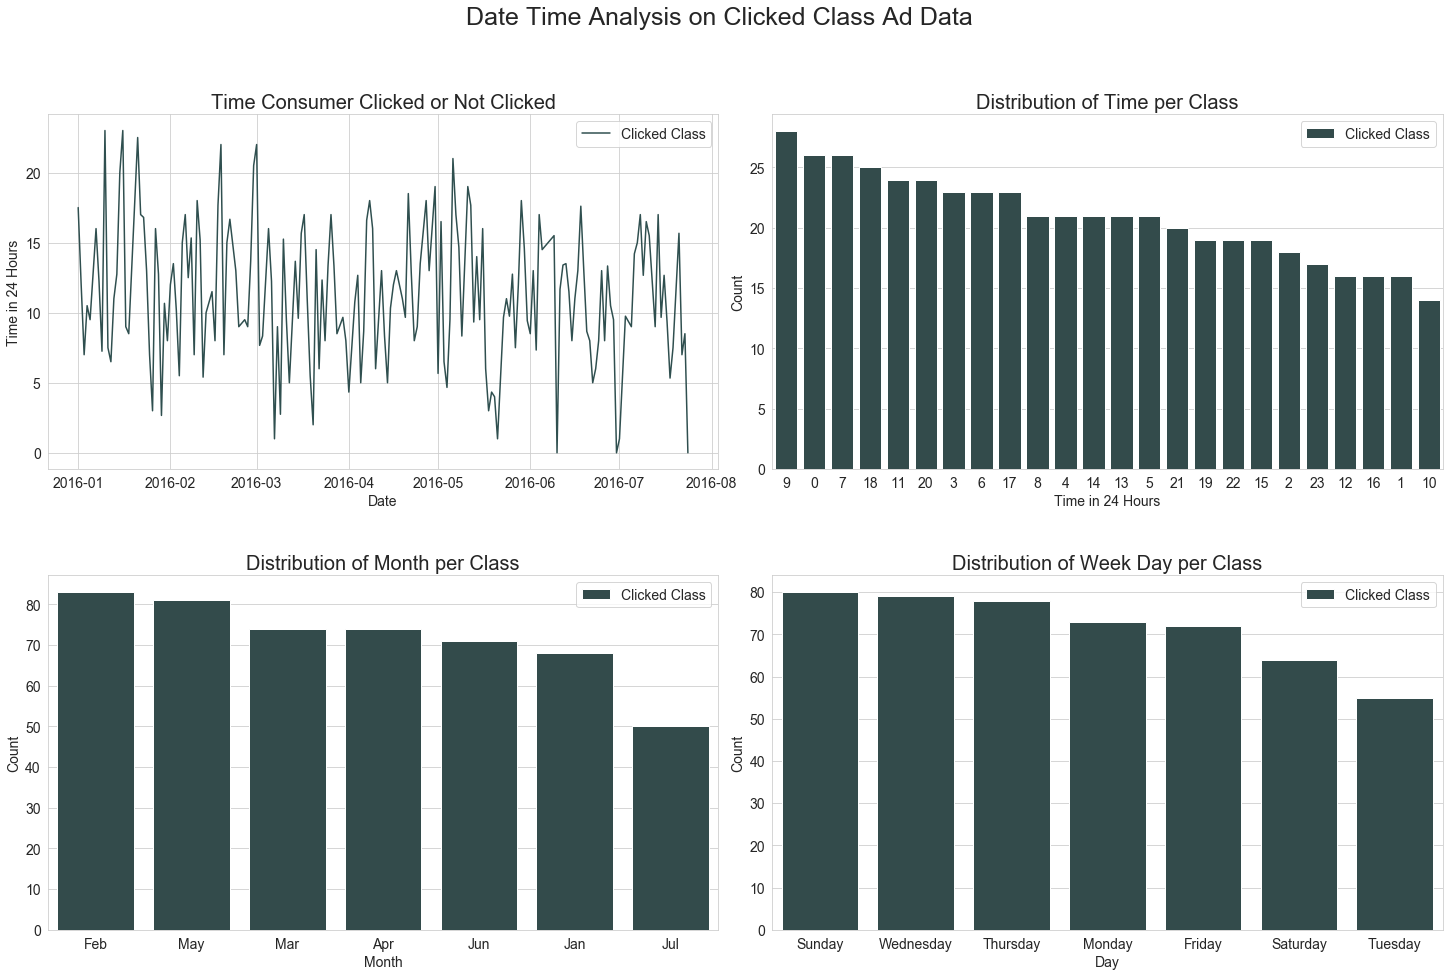

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (25, 15))
plt.subplots_adjust(wspace=0.08, hspace=0.3)

plt.suptitle("Date Time Analysis on Clicked Class Ad Data ",fontsize=25)

# Daily time spent on site distribution for target marketing ads
plt.subplot(2, 2, 1)
ax = sns.lineplot(x=clicked['Date'],y=clicked['Time'],data=clicked,color='darkslategrey',err_style=None,label='Clicked Class')
ax.axes.set_title("Time Consumer Clicked or Not Clicked",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Time in 24 Hours",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 2)
ax= sns.countplot(x='Time', data=clicked,order=clicked['Time'].value_counts().index,color='darkslategrey',label='Clicked Class')
ax.axes.set_title("Distribution of Time per Class",fontsize=20)
ax.set_xlabel("Time in 24 Hours",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 3)
ax= sns.countplot(x='Month_Name', data=clicked,order=clicked['Month_Name'].value_counts().index,color='darkslategrey',label='Clicked Class')
ax.axes.set_title("Distribution of Month per Class",fontsize=20)
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 4)
ax= sns.countplot(x='Day_Week', data=clicked, order=clicked['Day_Week'].value_counts().index,color='darkslategrey',label='Clicked Class')
ax.axes.set_title("Distribution of Week Day per Class",fontsize=20)
ax.set_xlabel("Day",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.show();

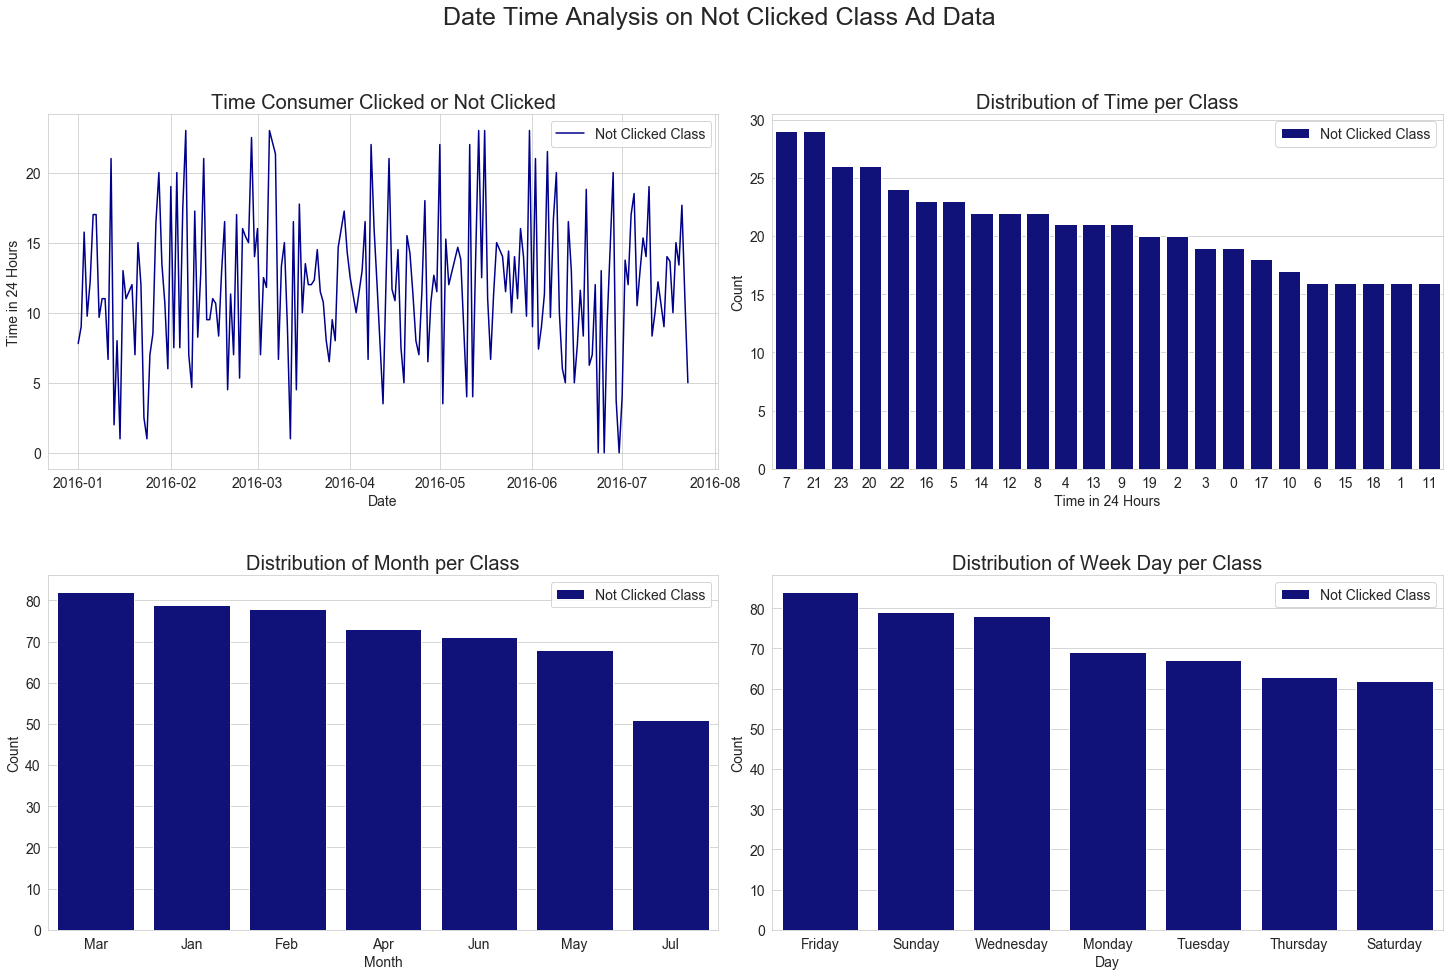

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (25, 15))
plt.subplots_adjust(wspace=0.08, hspace=0.3)

plt.suptitle("Date Time Analysis on Not Clicked Class Ad Data ",fontsize=25)

# Daily time spent on site distribution for target marketing ads
plt.subplot(2, 2, 1)
ax = sns.lineplot(x=not_clicked['Date'],y=not_clicked['Time'],data=clicked,color='darkblue',err_style=None,label='Not Clicked Class')
ax.axes.set_title("Time Consumer Clicked or Not Clicked",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Time in 24 Hours",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 2)
ax= sns.countplot(x='Time', data=not_clicked,order=not_clicked['Time'].value_counts().index,color='darkblue',label='Not Clicked Class')
ax.axes.set_title("Distribution of Time per Class",fontsize=20)
ax.set_xlabel("Time in 24 Hours",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 3)
ax= sns.countplot(x='Month_Name', data=not_clicked,order=not_clicked['Month_Name'].value_counts().index,color='darkblue',label='Not Clicked Class')
ax.axes.set_title("Distribution of Month per Class",fontsize=20)
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.subplot(2, 2, 4)
ax= sns.countplot(x='Day_Week', data=not_clicked, order=not_clicked['Day_Week'].value_counts().index,color='darkblue',label='Not Clicked Class')
ax.axes.set_title("Distribution of Week Day per Class",fontsize=20)
ax.set_xlabel("Day",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

plt.show();

## 5. Feature Selection

It is always said gold in gold out, that is feeding your ML model with clean, good quality and highly representative data will give in return good results! To perform feature selection, we have to do some feature transformation as an initial step to make machine learning model effective at captur trend. This section will cover: 

1. Feature Transformation. 

        1.1 Drop Unnecessary Columns 
        1.2 Normalize Numerical Features.
        1.3 Transform Categorical Features.

2. Feature Selection:

        2.1 Statistical Testing with Chi-Square . 
        2.2 PPS and Pearson Correlation.
        2.3 Feature Importance with Ensembles.

### 5.1 Feature Transformation

Before performing feature importance or train machine learning model, we will transform some feature (normalization) to avoid biasness due features' distributions. Previously in EDA, we have seen some features have skewed distribution and to avoid the following issue, we will perform some normalization to reduce the effect of bias and outliers if existed. 

1. Drop unnecessary columns. 
2. Convert categorical variables into numeric by label encoding.  
3. Identify numerical varibles and normalize feature to have values between 0-1. 

In [27]:
# Create a copy for feature importance model
df_copy = df.copy()
# Drop some unnecessary columns as those only extracted to understand consumers behaviours!
df_copy.drop(['Ad_Topic_Line','Date','Day_Week','Month_Name','City'],axis=1, inplace=True)

# Create an object to label encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# convert the categorical variables into numeric 
df_copy['Country'] = le.fit_transform(df_copy['Country'])

# # Identify numerical variable 
numerica_var = ['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage','Male','Time','Week_Day','Month','Country']

# Create an object for normalization 
scaler = MinMaxScaler()
# Normalize numerical values
df_copy[numerica_var] = scaler.fit_transform(df_copy[numerica_var]) 


df_copy.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Country,Clicked_on_Ad,Time,Week_Day,Month
0,0.617882,0.390244,0.730472,0.916031,0.0,0.911017,0.0,0.000000,1.000000,0.333333
1,0.809621,0.292683,0.831375,0.538746,1.0,0.622881,0.0,0.043478,0.000000,0.500000
2,0.626721,0.170732,0.699200,0.797433,0.0,0.779661,0.0,0.869565,1.000000,0.333333
3,0.706272,0.243902,0.623160,0.854280,1.0,0.436441,0.0,0.086957,1.000000,0.000000
4,0.608023,0.390244,0.914568,0.731323,0.0,0.406780,0.0,0.130435,0.666667,0.833333


In [28]:
# Get input features 
X_c = df_copy.drop('Clicked_on_Ad',axis=1)
# Get target varible
y_c = df_copy['Clicked_on_Ad']

### 5.2 Feature Selection
Before feeding classifiers with features, I will do feature selection and importance for all input features. Methods to used here are: 

1. Statistical Testing with t-Test. 
2. Statistical Testing with Chi-Square. 
3. PPS and Pearson Correlation.
4. Feature Importance with Ensembles aka Random Forest Classifier.

This will ensure less computational time when training models and good predictability! 

#### 5.2.1 Statistical Testing t-Test 
In the above visualization, we have seen some interesting patterns for some features associated with a specific class. However, we would like to further support above insights with some statistical test for those observed some differences in mean. 

T-test is selected to determine if these groups or classes are different. 

In [29]:
def t_test(df,target,feature):
    
    para1 = df[df[target]==1][feature]
    para2 = df[df[target]==0][feature]
    tc, pc = st.ttest_ind(para1,para2)
    
    if pc < 0.05:
        print('There is significant difference between ' + 'Clicked Class '+ ' & Not Clicked Class on ' + feature)
        print('2 sample t-test for '+ target +' & '+ feature)
        print('\n')
        print ("t-test: t = %g  p = %g" % (tc, pc))
    else:
        print('There is no significant difference between ' + 'Clicked Class '+ ' & Not Clicked Class on ' + feature)
        print('2 sample t-test for '+ target +' & '+ feature)
        print('\n')
        print ("t-test: t = %g  p = %g" % (tc, pc))

In [30]:
# T-test for clicked and not clicked on Daily Time spent on site
t_test(df_copy,'Clicked_on_Ad',"Daily_Time_Spent_on_Site")

There is significant difference between Clicked Class  & Not Clicked Class on Daily_Time_Spent_on_Site
2 sample t-test for Clicked_on_Ad & Daily_Time_Spent_on_Site


t-test: t = -35.6379  p = 2.83474e-180


In [31]:
# T-test for clicked and not clicked on Age
t_test(df_copy,'Clicked_on_Ad',"Age")

There is significant difference between Clicked Class  & Not Clicked Class on Age
2 sample t-test for Clicked_on_Ad & Age


t-test: t = 17.8915  p = 2.48861e-62


In [32]:
# T-test for clicked and not clicked on Average Area Income
t_test(df_copy,'Clicked_on_Ad',"Area_Income")

There is significant difference between Clicked Class  & Not Clicked Class on Area_Income
2 sample t-test for Clicked_on_Ad & Area_Income


t-test: t = -17.0977  p = 1.06989e-57


In [33]:
# T-test for clicked and not clicked on Daily Internet Usage
t_test(df_copy,'Clicked_on_Ad',"Daily_Internet_Usage")

There is significant difference between Clicked Class  & Not Clicked Class on Daily_Internet_Usage
2 sample t-test for Clicked_on_Ad & Daily_Internet_Usage


t-test: t = -40.3609  p = 3.42482e-212


In [34]:
# T-test for clicked and not clicked on Daily Internet Usage
t_test(df_copy,'Clicked_on_Ad',"Male")

There is no significant difference between Clicked Class  & Not Clicked Class on Male
2 sample t-test for Clicked_on_Ad & Male


t-test: t = -1.29676  p = 0.195012


In [35]:
# T-test for clicked and not clicked on Country
t_test(df_copy,'Clicked_on_Ad',"Country")

There is no significant difference between Clicked Class  & Not Clicked Class on Country
2 sample t-test for Clicked_on_Ad & Country


t-test: t = 0.460833  p = 0.645019


In [36]:
# T-test for clicked and not clicked on Time
t_test(df_copy,'Clicked_on_Ad',"Time")

There is no significant difference between Clicked Class  & Not Clicked Class on Time
2 sample t-test for Clicked_on_Ad & Time


t-test: t = -1.48553  p = 0.137718


In [37]:
# T-test for clicked and not clicked on Weekday
t_test(df_copy,'Clicked_on_Ad',"Week_Day")

There is no significant difference between Clicked Class  & Not Clicked Class on Week_Day
2 sample t-test for Clicked_on_Ad & Week_Day


t-test: t = 0.0955605  p = 0.923889


In [38]:
# T-test for clicked and not clicked on Month
t_test(df_copy,'Clicked_on_Ad',"Month")

There is no significant difference between Clicked Class  & Not Clicked Class on Month
2 sample t-test for Clicked_on_Ad & Month


t-test: t = 0.669107  p = 0.503581


**t-Test Results:**
1. There is statistical significant difference on daily time spent on site, daily internet usage, average area income and age between clicked and not clicked class.
2. There is no statistical significant difference on gender class, country, time, week day, and month between clicked and not clicked class. 

#### 5.2.2 Statistical Testing - Chi Square 

In [39]:
def chi2_test(features,target,num_features):
    # create an object 
    best_feature = SelectKBest(score_func=chi2,k=num_features)
    # fitting model 
    sel_chi = best_feature.fit(features,target)
    # get the score of each feature and store it in DF
    sel_chi_feat= pd.DataFrame(sel_chi.scores_,index = features.columns,columns=['Score']).sort_values('Score', ascending=False)
    
    # Plot the feature and score 
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Score", y=sel_chi_feat.index,data=sel_chi_feat, color='darkblue')
    plt.title("Chi Square Test Variable Score",fontsize=20)
    plt.ylabel("Feature", fontsize=14)
    plt.xlabel("Score", fontsize=14)
    plt.tick_params(labelsize=14)
    plt.show();

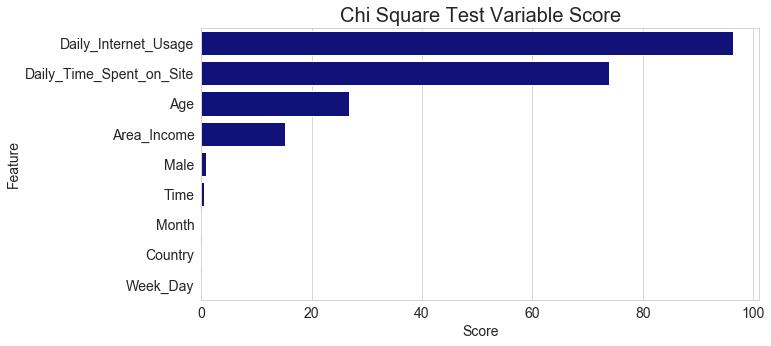

In [40]:
# Get feature score from chi square test
chi2_test(X_c,y_c,9)

#### 5.2.3 PPS & Pearson Correlation

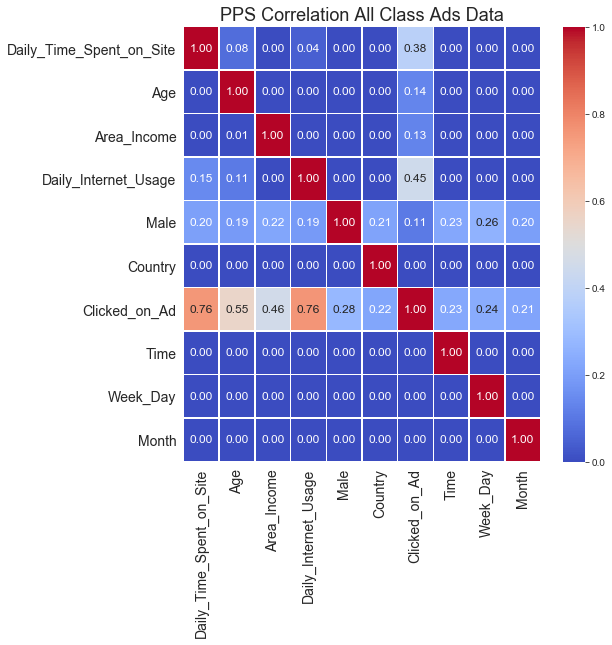

In [41]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.heatmap(pps.matrix(df_copy,sample=None), vmin=0, vmax=1, cmap='coolwarm',linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f")
ax.axes.set_title("PPS Correlation All Class Ads Data",fontsize=18)
ax.tick_params(labelsize=14)

plt.show();

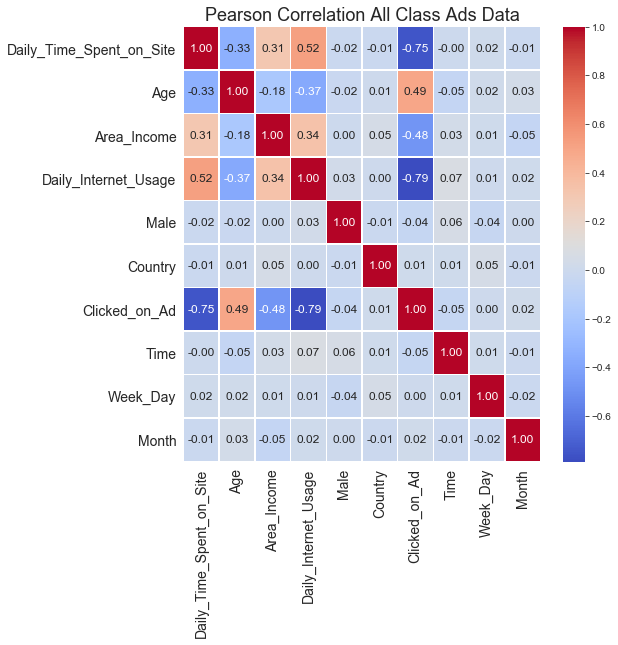

In [42]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.heatmap(df_copy.corr(),cmap='coolwarm',linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f")
ax.axes.set_title("Pearson Correlation All Class Ads Data",fontsize=18)
ax.tick_params(labelsize=14)

**Correlation Summary:**

1. Pearson correlation shows associative correlation among some features but not all. The highly associative features are **daily time spent on site, area income, age and daily internet usage**. The rest of feature are uncorrelated or have low correlation. 

2. The power predictive score show a high level of predictable between target variable and **(daily time spent on site, area income, age, daily internet usage and male)**. The other features has very low level of predictability with target level. 

### 5.2.4 Ensembles Feature Importance

In this part we use Random Forest feature importance property. It returns score of every feature in the data, the higher the score the more important it is to predict your target variable.

In [43]:
def rf_clf_fea(features, target):
    # initalize model object
    rf_clf = RandomForestClassifier(random_state=42)
    # fit the model
    rf_clf.fit(features,target)
    train = pd.DataFrame(np.atleast_2d(features), columns=features.columns)
    feature_importances = pd.DataFrame(rf_clf.feature_importances_,index = train.columns,
                                       columns=['Score']).sort_values('Score', ascending=False)
    
    # Plot the feature and score 
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Score", y=feature_importances.index,data=feature_importances, color='darkblue')
    plt.title("Random Forest Variable Importance Score",fontsize=20)
    plt.ylabel("Feature", fontsize=14)
    plt.xlabel("Score", fontsize=14)
    plt.tick_params(labelsize=14)
    plt.show();

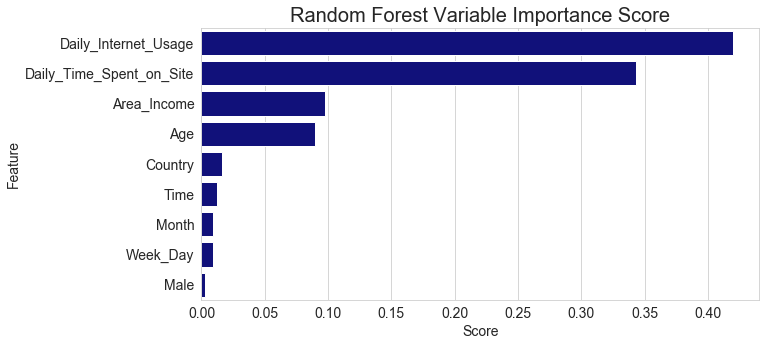

In [44]:
# Get features importance from random forest
rf_clf_fea(X_c,y_c)

From above feature selection techniques, we can select some features to train ML models where high accuracy can be achieved. After evaluating features performance, the following features will be considered to train the models: 

1. Daily Internet Usage. 
2. Daily Time spent on Site. 
3. Area Income. 
4. Age.  

In [45]:
# Identify numerical variable 
selected_var = ['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage']
# Get the features
X = df[selected_var]
X[selected_var] = scaler.fit_transform(X[selected_var]) 
# Get target varible 
y = df['Clicked_on_Ad']
# Split data into 70% training and 30% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y) 

print('Training Data Shape',X_train.shape,y_train.shape)
print('Testing Data Shape',X_test.shape,y_test.shape)

Training Data Shape (702, 4) (702,)
Testing Data Shape (301, 4) (301,)


In [46]:
y_test[y_test==1].count()

150

## 6. Model Selection

**ML Models:** 

In this section three ML classifiers will be trained to predict who will clicked who will not click on ads. I select Logistic Regression as one of the classifiers due to its ability to classify instance of classes based on predicting its probability of belonging to a specific class. The two other models are XgBoost and Random Forest which are famous of creating uncorrelated large number of estimators (trees) which takes the vote of all trees to give single result iteratively. 

For kick off, a baseline model is developed to compare performance with other classifiers, GaussianNB (Naive Bayes) is selected. 

**Metrics:**

Since we are interested in making predictions for a two class classification problem, we have to fully understand the type of errors associated with classification to perfectly measure the model performance. The data we have is balance, thus we do not have to worry about 

For this project, I develope a function that performs GridSearch (5 Folds) to measure the following metrics:
  
1. Accuracy. 
2. Area Under Receiver operating characteristic (ROC) Curve. 
3. F1-Score. 
4. F-beta Score. 

The idea behind measuring these scores is to evaluate model perfromance under every score metric. For final testing of the model, I pass the models with best estimators obtained in GridSearch to test model on unseen data by measuring the following metrics: 

1. AUPRC. 
2. F-Beta. 
3. F1- Score.
4. Precision.
5. Recall.
6. AUC.

**Business & Profit** 

Back to define the proble mentioned above, we are aiming to help a client to develope a predictive model for who are more likely to click on the ads for a marketing campign. I have defined some financial statments to present model performance from business perspective. Remind you for those statments here:

1. Client will spend **550 CAD** for a potenial customer. 
2. **Overall Profit** from targeted customer who clicks on ad is **150 CAD**. 
3. **Loss** from targeted customer who does not click on ad is **600 CAD**. 
4. **Profit** from un-targeted customer who clicks on ad is **700 CAD**. 
5. Product is **un-known**.

The question here is, how this can be related to ML classifier? The performance of ML classifier is describe by confusion matrix table, it is simple to undersatnd, but related terminology can be confusing. Let's define them here. 

- **Positive class** is 1, clicked on ad, **Negative class** is 0, not clicked on ad. 


- *False Positive* (**FP**): It means actual class is Clicked **(consumer clicked on Ads)** and incorrectly classified as **Not Clicked**. Then this type of category matched with defination of **We did not target a consumer, but consumer clicked on ads,GAINING MONEY 700 CAD**. 


- *True Positive* (**TP**): It means actual class is Clicked **(consumer clicked on Ads)** and correctly classified as **clicked**. Then this type of category matched with defination of **We target a consumer and clicked on ads,GAINING MONEY 150 CAD**. 



- *False Negative* (**FN**): It means actual class is Not Clicked **(consumer did not clicked on Ads)** and incorrectly classified as **Clicked**. Then this type of category matched with defination of  **We target a consumer but the consumer did not clicke on ads,LOSSING MONEY 600 CAD**. 


- *True Negative* (**TN**): It means actual class is Not Clicked **(consumer did not clicked on Ads)** and correctly classified as **Not Clicked**. Then this type of category matched with defination of **We did not target a consumer and the consumer did not click on ads, NOT GAININ or LOSSING MONEY**.

### 6.1 Model Selection: Baseline 

A baseline is the result of a very basic model. We aim to create a baseline and then try to make more complex solutions in order to get a better result.

In [47]:
#Baseline model NaiveBayes

# Initialize model object
NB_clf = GaussianNB()
# Fit the model
NB_clf.fit(X_train,y_train)
# Predict training data
y_predict_tr = NB_clf.predict_proba(X_train)[:,1]
# Evaluate model by measuring the Precision and Recall score on training data 
clf_precision_tr, clf_recall_tr,_ = precision_recall_curve(y_train, y_predict_tr)
# Getting the area under the precision and recall curve for training data
clf_auc_train = auc(clf_recall_tr, clf_precision_tr)

# Results on training data 
print("Baseline Model:Naive Bayes")
print('\n')
print('Training Sets')
print('The AUPRC score on training data is', clf_auc_train)
print('The accuracy score on training data is', accuracy_score(y_train, NB_clf.predict(X_train)))
print('The AUC score on training data is', roc_auc_score(y_train, NB_clf.predict(X_train)))
print('The F1 score on training data is',f1_score(y_train, NB_clf.predict(X_train)))
print('The F-beta score on training data is',fbeta_score(y_train, NB_clf.predict(X_train),0.5))


print('Confusion Matrix - Testing Dataset')
print('\n')
print(pd.crosstab(y_train,NB_clf.predict(X_train), rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print(classification_report(y_train,NB_clf.predict(X_train),target_names = ['Not Clicked','Clicked']))


# Predict testing data, unseen
y_pred_clf = NB_clf.predict_proba(X_test)[:,1]
clf_precision, clf_recall, _ = precision_recall_curve(y_test, y_pred_clf)
# Getting the area under the precision and recall curve on original testing data
clf_auc = auc(clf_recall, clf_precision)

print('\n')
print('Testing Sets')
print('The AUPRC score on testing data is', clf_auc)
print('The accuracy score on testing data is', accuracy_score(y_test, NB_clf.predict(X_test)))
print('The AUC score on testing data is', roc_auc_score(y_test, NB_clf.predict(X_test)))
print('The F1 score on testing data is',f1_score(y_test, NB_clf.predict(X_test)))
print('The F-beta score on testing data is',fbeta_score(y_test, NB_clf.predict(X_test),0.5))

print('Confusion Matrix - Testing Dataset')
print('\n')
print(pd.crosstab(y_test,NB_clf.predict(X_test), rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print(classification_report(y_test,NB_clf.predict(X_test),target_names = ['Not Clicked','Clicked']))

Baseline Model:Naive Bayes


Training Sets
The AUPRC score on training data is 0.9913046198680803
The accuracy score on training data is 0.9643874643874644
The AUC score on training data is 0.9643874643874645
The F1 score on training data is 0.9644381223328592
The F-beta score on training data is 0.9636156907333712
Confusion Matrix - Testing Dataset


Predicted  0.0  1.0  All
Actual                  
0.0        338   13  351
1.0         12  339  351
All        350  352  702
              precision    recall  f1-score   support

 Not Clicked       0.97      0.96      0.96       351
     Clicked       0.96      0.97      0.96       351

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702



Testing Sets
The AUPRC score on testing data is 0.9977406541904693
The accuracy score on testing data is 0.9634551495016611
The AUC score on testing data is 0.9634437086092715
The F1 score on 

**Results Testing Sets**

1. The model is able to classified 146 consumers as not clicked correctly and incorrectly classified 5 consumers as clicked. 
2. On the other hand, the model correctly classified 144 consumers as clicked and incorrectly classified 6 consumers as not clicked. 
3. It has an Accuracy of 96.34%, AUC of 96.34%, F-beta of 96.51% and AUPRC of 99.77%. 
4. It has a precision of 97% and a recall of 96% for clicked class. 

**Investment Return:**

Gain from TP = (TP * 150) = (144 * 150) = 21600 CAD. 

Gain from FP = (FP * 700) = (6 * 700) = 4200 CAD.

Loss from FN = - (FN * 600) = - (5 * 600) = -3000 CAD 

**Overall Profit from Campign = 21600 + 4200 - 3000 = 22,800 CAD**


In [48]:
# A function to perform a gridsearch on specific model and its parameters to gridseach 
def clf_grid_search(model,param,score,Xt,Yt):
    # Record the start time 
    start = datetime.datetime.now()
    # Classifier parameters
    clf_params = param
    # Set of scoring metrics considered to evalute the gridsearch model
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score),
    'auc_score': make_scorer(roc_auc_score),
    'fbeta_score' :make_scorer(fbeta_score,beta=0.5)
    }

    # Instinuate the gridsearch model
    grid_clf =GridSearchCV(model, clf_params,scoring=scorers, refit=score,cv=5, return_train_score=True,n_jobs=-1,verbose = 1) 
    # Fitting the gridsearch model
    grid_clf.fit(Xt, Yt)

    # We automatically get classifier with the best parameters.
    best_estimator = grid_clf.best_estimator_
    best_score = print("The best score obtained is",grid_clf.best_score_)
    
    # Printing the time taken to do gridsearch 
    end = datetime.datetime.now()
    Time = print("The GridSearch Time is: ",end-start)
    # Return the time and best estimators
    return best_score, Time, best_estimator

In [49]:
# A function to get model performance on original unseen data after being trained on best estimaotirs obtained from GridSearch 
def classifier_performance(model,best_estimators,xtrain,ytrain,xtest,ytest):

    # instiniate model with best estimators obtained from gridsearch on training model
    clf = best_estimators

    # Fitting the model
    clf.fit(xtrain, ytrain)
    # Getting the probability predicted class on training data 
    y_predt_clf = clf.predict_proba(xtrain)[:,1]
    # Evaluate model by measuring the Precision and Recall score on training data 
    clf_precision_tr, clf_recall_tr,_ = precision_recall_curve(ytrain, y_predt_clf)
    # Getting the area under the precision and recall curve
    clf_auc_train = auc(clf_recall_tr, clf_precision_tr)
    clf_acc_train = accuracy_score(ytrain,clf.predict(xtrain))
    clf_fbeta_train = fbeta_score(ytrain,clf.predict(xtrain),beta=0.5)

    # Getting the probability predicted class on testing data 
    y_pred_clf = clf.predict_proba(xtest)[:,1]
    # Evaluate model by measuring the Precision and Recall score on original testing data 
    clf_precision, clf_recall, _ = precision_recall_curve(ytest, y_pred_clf)
    # Getting the area under the precision and recall curve on original testing data
    clf_auc = auc(clf_recall, clf_precision)
    clf_acc_test = accuracy_score(ytest,clf.predict(xtest))
    clf_fbeta_test = fbeta_score(ytest,clf.predict(xtest),beta=0.5)

    # Printing the score obtained on original testing data
    
    print(model)
    print("The Area Under Precision Recall Curve on the Training Data is:", clf_auc_train)
    print("The Accuracy Score on the Training Data is:", clf_acc_train)
    print("The F-Beta Score on the Training Data is:", clf_fbeta_train)
    print('\n')
    
    print('Confusion Matrix - Training Dataset')
    print('\n')
    print(pd.crosstab(ytrain,clf.predict(xtrain), rownames = ['Actual'], colnames = ['Predicted'], margins = True))
    print(classification_report(ytest,clf.predict(xtest),target_names = ['Not Clicked','Clicked']))
    print("AUC: ","{:0.1%}".format(roc_auc_score(ytrain,clf.predict(xtrain))))
    
    
    print("The Area Under Precision Recall Curve on the Testing Data is:", clf_auc)
    print("The Accuracy Score on the Testing Data is:", clf_acc_test)
    print("The F-Beta Score on the Testing Data is:", clf_fbeta_test)
    print('\n')

    print('Confusion Matrix - Testing Dataset')
    print('\n')
    print(pd.crosstab(ytest,clf.predict(xtest), rownames = ['Actual'], colnames = ['Predicted'], margins = True))
    print(classification_report(ytest,clf.predict(xtest),target_names = ['Not Clicked','Clicked']))
    print("AUC: ","{:0.1%}".format(roc_auc_score(ytest,clf.predict(xtest))))
    
    # plot the precision-recall curves
    plt.figure(figsize = (10,6))
    plt.plot(clf_recall_tr, clf_precision_tr, marker='.', label='Training',color='darkblue')
    plt.plot(clf_recall, clf_precision, marker='.', label='Testing',color='darkorange')
    # axis labels
    plt.title(model+' Performance on AUPRC',fontsize=18)
    plt.xlabel('Recall',fontsize=14)
    plt.ylabel('Precision',fontsize=14)
    plt.tick_params(labelsize=14)
    # show the legend
    plt.legend(fontsize='x-large',loc='best')
    # show the plot
    plt.show();

### 6.2 Model Selection: Logistic Regression 

In [50]:
# Getting the gridsearch precision score for logistic regression model on sampled training data
lg_par={"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5, 10],
        'random_state': [42]}
_, _, estimatorlg_acc = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='accuracy_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s


The best score obtained is 0.970111448834853
The GridSearch Time is:  0:00:02.908684


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.8s finished


In [51]:
# Getting the gridsearch recall score for logistic regression model on sampled training data
_, _, estimatorlg_f1 = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='f1_score',Xt=X_train,Yt=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


The best score obtained is 0.9696738092790319
The GridSearch Time is:  0:00:00.632534


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.5s finished


In [52]:
# Getting the gridsearch recall score for logistic regression model on sampled training data
_, _, estimatorlg_auc = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='auc_score',Xt=X_train,Yt=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


The best score obtained is 0.9701006036217305
The GridSearch Time is:  0:00:00.565674


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.5s finished


In [53]:
# Getting the gridsearch recall score for logistic regression model on sampled training data
_, _, estimatorlg_fbeta = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='fbeta_score',Xt=X_train,Yt=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


The best score obtained is 0.9790085286028536
The GridSearch Time is:  0:00:00.610229


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.5s finished


In [54]:
print(estimatorlg_fbeta)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression
The Area Under Precision Recall Curve on the Training Data is: 0.9918563579249072
The Accuracy Score on the Training Data is: 0.9672364672364673
The F-Beta Score on the Training Data is: 0.9744037230948226


Confusion Matrix - Training Dataset


Predicted  0.0  1.0  All
Actual                  
0.0        344    7  351
1.0         16  335  351
All        360  342  702
              precision    recall  f1-score   support

 Not Clicked       0.96      0.99      0.97       151
     Clicked       0.99      0.95      0.97       150

    accuracy                           0.97       301
   macro avg       0.97      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301

AUC:  96.7%
The Area Under Precision Recall Curve on the Testing Data is: 0.9976920112746807
The Accuracy Score on the Testing Data is: 0.9700996677740864
The F-Beta Score on the Testing Data is: 0.9794520547945207


Confusion Matrix - Testing Dataset


Predicted  0.0  1.0  All
Actu

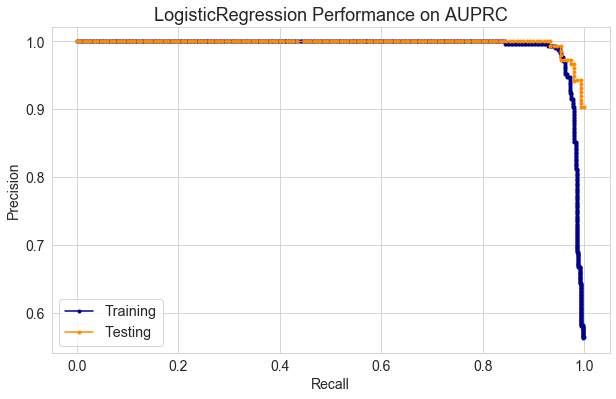

In [55]:
# Getting the classifier performance after being trained with best estimators based on auc and recall 
classifier_performance("LogisticRegression",best_estimators=estimatorlg_fbeta,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test)

**Results Testing Sets**
1. The model is able to classified 149 consumers as not clicked correctly and incorrectly classified 2 consumers as clicked. 
2. On the other hand, the model correctly classified 143 consumers as clicked and incorrectly classified 7 consumers as not clicked. 
3. It has an Accuracy of 97.01%, AUC of 97.0%, F-beta of 97.95% and AUPRC of 99.77%. 
4. It has a precision of 99% and a recall of 95% for clicked class. 

**Investment Return:**

Gain from TP = (TP * 150) = (143 * 150) = 21450 CAD. 

Gain from FP = (FP * 700) = (7 * 700) = 4900 CAD.

Loss from FN = - (FN * 600) = - (2 * 600) = -1200 CAD 

**Overall Profit from Campign = 21450 + 4900 - 1200 = 25,150 CAD**


### 6.3 Model Selection: Random Forest

In [56]:
# Getting the gridsearch precision score for randomforest model on sampled training data
rf_par = {'max_depth':[5,10,15,20],'min_samples_split' : [2, 5, 10],'min_samples_leaf' :[1,2,5,10],"random_state":[42],
         'n_estimators': [5,10,15,20,25,50,100,200,300]}

_, _, estimatorrf_acc = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='accuracy_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.5min finished


The best score obtained is 0.9615298885511653
The GridSearch Time is:  0:01:28.542883


In [57]:
_, _, estimatorrf_f1 = clf_grid_search(model=RandomForestClassifier(n_estimators=600,random_state=45),param=rf_par ,score='f1_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1306 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.3min


The best score obtained is 0.9613449043901838
The GridSearch Time is:  0:01:30.505220


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.5min finished


In [58]:
_, _, estimatorrf_auc = clf_grid_search(model=RandomForestClassifier(n_estimators=600,random_state=45),param=rf_par ,score='auc_score',Xt=X_train,Yt=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:  1.4min


The best score obtained is 0.9615090543259559
The GridSearch Time is:  0:01:31.057348


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.5min finished


In [59]:
_, _, estimatorrf_fbeta = clf_grid_search(model=RandomForestClassifier(n_estimators=600,random_state=45),param=rf_par ,score='fbeta_score',Xt=X_train,Yt=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1314 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:  1.3min


The best score obtained is 0.9682637691025686
The GridSearch Time is:  0:01:31.738652


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.5min finished


In [60]:
print(estimatorrf_fbeta)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


RandomForest Classifier
The Area Under Precision Recall Curve on the Training Data is: 0.9998255081560419
The Accuracy Score on the Training Data is: 0.9943019943019943
The F-Beta Score on the Training Data is: 0.9976998274870614


Confusion Matrix - Training Dataset


Predicted  0.0  1.0  All
Actual                  
0.0        351    0  351
1.0          4  347  351
All        355  347  702
              precision    recall  f1-score   support

 Not Clicked       0.95      0.98      0.97       151
     Clicked       0.98      0.95      0.97       150

    accuracy                           0.97       301
   macro avg       0.97      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301

AUC:  99.4%
The Area Under Precision Recall Curve on the Testing Data is: 0.9937180334471375
The Accuracy Score on the Testing Data is: 0.9667774086378738
The F-Beta Score on the Testing Data is: 0.9741144414168939


Confusion Matrix - Testing Dataset


Predicted  0.0  1.0  All

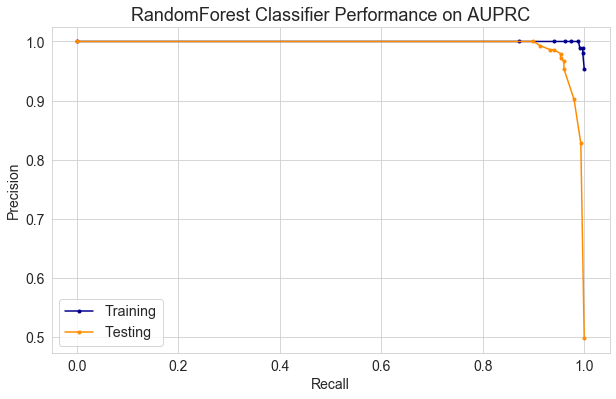

In [61]:
# Getting the classifier performance after being trained with best estimators based on auc and recall 
classifier_performance("RandomForest Classifier",best_estimators=estimatorrf_fbeta,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test)

**Results Testing Sets**

1. The model is able to classified 148 consumers as not clicked correctly and incorrectly classified 3 consumers as clicked. 
2. On the other hand, the model correctly classified 143 consumers as clicked and incorrectly classified 7 consumers as not clicked. 
3. It has an Accuracy of 96.68%, AUC of 96.7%, F-beta of 97.41% and AUPRC of 99.37%. 
4. It has a precision of 98% and a recall of 95% for clicked class. 

**Investment Return:**

Gain from TP = (TP * 150) = (143 * 150) = 21450 CAD. 

Gain from FP = (FP * 700) = (7 * 700) = 4900 CAD.

Loss from FN = - (FN * 600) = - (3 * 600) = -1800 CAD 

**Overall Profit from Campign = 21450 + 4900 - 1800 = 24,550 CAD**


### 6.4 Model Selection: X_gboost

In [62]:
xgb_par = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5],'n_estimators': [5,10,15,20,25,50,100,200,300],
           'random_state': [42]}
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',silent=True, nthread=1)

In [63]:
_, _, estimatorxgb_acc = clf_grid_search(model=xgb,param=xgb_par ,score='accuracy_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 3645 candidates, totalling 18225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 18225 out of 18225 | elapsed:  3.1min finished


The best score obtained is 0.9643870314083081
The GridSearch Time is:  0:03:04.998145


In [64]:
_, _, estimatorxgb_f1 = clf_grid_search(model=xgb,param=xgb_par ,score='f1_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 3645 candidates, totalling 18225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 18225 out of 18225 | elapsed:  3.2min finished


The best score obtained is 0.9641436619207363
The GridSearch Time is:  0:03:11.727039


In [65]:
_, _, estimatorxgb_auc = clf_grid_search(model=xgb,param=xgb_par ,score='auc_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 3645 candidates, totalling 18225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:  2.3min


The best score obtained is 0.9643661971830987
The GridSearch Time is:  0:03:02.066844


[Parallel(n_jobs=-1)]: Done 18225 out of 18225 | elapsed:  3.0min finished


In [66]:
_, _, estimatorxgb_fbeta = clf_grid_search(model=xgb,param=xgb_par ,score='fbeta_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 3645 candidates, totalling 18225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 18225 out of 18225 | elapsed:  3.1min finished


The best score obtained is 0.9678861959539811
The GridSearch Time is:  0:03:07.253944


XGBClassifier
The Area Under Precision Recall Curve on the Training Data is: 0.9949601604388373
The Accuracy Score on the Training Data is: 0.9672364672364673
The F-Beta Score on the Training Data is: 0.9727851766068325


Confusion Matrix - Training Dataset


Predicted  0.0  1.0  All
Actual                  
0.0        343    8  351
1.0         15  336  351
All        358  344  702
              precision    recall  f1-score   support

 Not Clicked       0.95      0.97      0.96       151
     Clicked       0.97      0.95      0.96       150

    accuracy                           0.96       301
   macro avg       0.96      0.96      0.96       301
weighted avg       0.96      0.96      0.96       301

AUC:  96.7%
The Area Under Precision Recall Curve on the Testing Data is: 0.9956663109577377
The Accuracy Score on the Testing Data is: 0.9634551495016611
The F-Beta Score on the Testing Data is: 0.9688346883468834


Confusion Matrix - Testing Dataset


Predicted  0.0  1.0  All
Actual   

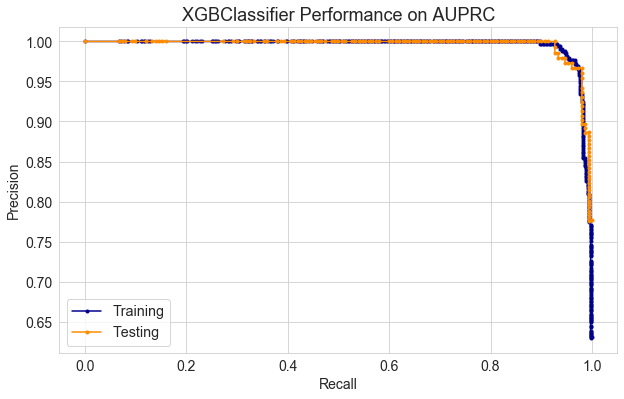

In [67]:
# Getting the classifier performance after being trained with best estimators based on auc and recall 
classifier_performance("XGBClassifier",best_estimators=estimatorxgb_fbeta,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test)

**Results Testing Sets**

1. The model is able to classified 147 consumers as not clicked correctly and incorrectly classified 4 consumers as clicked. 
2. On the other hand, the model correctly classified 143 consumers as clicked and incorrectly classified 7 consumers as not clicked. 
3. It has an Accuracy of 96.68%, AUC of 96.7%, F-beta of 97.41% and AUPRC of 99.37%. 
4. It has a precision of 97% and a recall of 95% for clicked class. 

**Investment Return:**

Gain from TP = (TP * 150) = (143 * 150) = 21450 CAD. 

Gain from FP = (FP * 700) = (7 * 700) = 4900 CAD.

Loss from FN = - (FN * 600) = - (4 * 600) = -2400 CAD 

**Overall Profit from Campign = 21450 + 4900 - 2400 = 23,950 CAD**


## 7. Conclusion

### 7.1 Model Evaluation and Business Discussion


As the business objective aims to predict how much profit marketing team can make by accurately classify which of their targeted customers are more likely 
to click on the ads; it is also important here to point out that profit that will be generated is highly depends on performance of the machine learning classifer. Therefore, a good classifier model is one that does not suffer from overfitting nor underfitting, one that has a balance between precision and recall where a high precision indicates a trusted model while a high recall indicates excellent classifier, both achieved in all 3 models. 

To recommend best model to marketing team, I selected 3 more reliable performance metrics namely AUC, Accuracy and F-beta score. 

**General Observations**
1. All classifiers do not suffer from overfitting or underfitting, that is there is a balance between bias and variance! 
2. Most of the 3 classifiers overperform the Baseline on both training and testing sets. 
3. From classification perspective, we can generate a lot of money from consumers who are not targeted by us, but they clicked on the add, **FP class,700CAD**. This can be explained as company is more likly popular or well know. 

**Evaluations on Testing Sets**

Considering test set which has a sample size of 301 customers, Logistic Regression classifier outperforms Baseline, Random Forest and Xgboost Classifier with following metrics: 

- AUC = 97%
- Accuracy = 97% 
- F-Beta Score = 97.97%

Logistic Regression predict **overall investiment return of $25,150 CAD** which includes: 

- Profit gain from True Positive $21,450 CAD

- Profit gain from False Positve $4,900 CAD 

- Loss from False Negative  -$2,400 CAD 



### 7.2 Business Recommendation

The marketing team can maximize client's profit by collecting some information about customers, those features which are proved to be essentail for machine learning classifier: 

1. Daily Internet Usage. 
2. Daily Time Spent on Site. 
3. Average Area Income. 
4. Age. 

To further maximize profit, data visualization above shows great insights and correlations with target class, therefore, potential targeted population would be consumers with: 

- Less spending habits on the site less than 60 minutes. 
- Less spending habits in the internet less than 150 minutes.
- Low and Middle Class income less than or equal to $50k CAD. 
- Aged between 30-50 years old. 
